In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Milan Škriniar,sk SVK,DF,Paris S-G+Inter,fr Ligue 1+it Serie A,0.0,1995.0,112.0,103.0,9325,103.7,0.06,0.06,0.06,0.06,0.06,0.08,0.06,0.08,28.0,23.0,82.14,4.0,14.29,80.77,8.45,35.72,40.38,4.99,0.79,80.77,0.27,0.22,0.04,53.06,246.53,121.18,0.97,0.71,0.01,0.52,0.23,61.06,0.81,0.78,0.04,0.65,0.00,0.01,0.09,0.04,0.65,0.04,0.00,0.00,0.00,0.00,0.00,7001.0,7533.0,92.94,127807.0,38169.0,2585.0,2753.0,94.52,3689.0,3846.0,95.92,586.0,742.0,78.98,0.00,0.01,0.02,-0.01,0.24,3.91,0.24,0.03,3.71,72.64,69.96,2.61,1.75,0.04,0.51,0.13,0.71,0.00,0.00,0.00,0.00,67.51,0.07,0.27,0.00,0.15,0.00,11.35,0.00,-0.5,-0.5,47.20,0.10,0.01,0.01,1.22,0.71,0.03,0.77,0.92,0.00,0.01,5.27,1.21,1.34,1.43,0.83,0.49,0.10,0.76,1.25,0.49,0.99,0.64,2.20,2.66,0.07,61.21,4,0,0,3,1,0
1,1,Maxence Lacroix,fr FRA,DF,Wolfsburg,de Bundesliga,0.0,2000.0,111.0,103.0,9070,100.8,0.06,0.08,0.06,0.08,0.04,0.06,0.04,0.06,75.0,58.0,77.33,17.0,22.67,70.67,8.29,37.50,31.56,2.13,0.84,70.67,0.74,0.58,0.17,40.25,207.32,110.79,0.57,0.47,0.05,0.73,0.26,43.50,0.27,0.87,0.06,0.72,0.02,0.03,0.07,0.02,0.72,0.05,0.00,0.00,0.01,0.00,0.00,4893.0,5859.0,83.51,102529.0,36399.0,1344.0,1562.0,86.11,2923.0,3193.0,91.54,645.0,1011.0,63.80,0.01,0.02,0.03,-0.00,0.22,3.36,0.19,0.02,4.02,58.13,55.23,2.72,2.26,0.03,0.47,0.21,0.11,0.00,0.00,0.00,0.00,48.54,0.18,0.51,0.00,0.14,0.00,10.89,0.00,1.8,1.8,57.18,0.16,0.06,0.02,1.06,0.82,0.01,1.74,1.03,0.00,0.04,5.95,2.48,1.86,1.77,1.20,0.53,0.04,0.89,1.40,0.5

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']
player_2021=player_2021[player_2021['Pos']=='FW']
player_2022=player_2022[player_2022['Pos']=='FW']
player_2023=player_2023[player_2023['Pos']=='FW']
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [5]:
# filter player_2024
player_2024= player_2024.loc[player_2024['Min']>= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [6]:
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024 = player_2024.reset_index(drop=True)

In [7]:
Saka_2024=player_2024[player_2024['Player']=='Bulkayo Saka']
Saka_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%


In [8]:
Saka=forward_players[forward_players['Player']=='Bukayo Saka']
Saka

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
54,422,Bukayo Saka,eng ENG,FW,Arsenal,eng Premier League,0.0,2001.0,143.0,138.0,11631,129.2,0.36,0.59,0.28,0.51,0.34,0.58,0.27,0.51,472.0,199.0,42.16,223.0,47.25,53.93,0.97,5.65,15.2,33.61,6.69,53.84,3.65,1.54,1.72,33.69,211.51,114.52,4.32,2.26,2.01,2.28,1.56,38.96,13.04,4.76,0.61,3.27,0.65,0.27,0.3,0.23,3.27,0.42,0.08,0.03,0.03,0.05,0.01,3948.0,5299.0,74.5,57088.0,13758.0,2412.0,2770.0,87.19,1154.0,1505.0,76.68,236.0,569.0,41.48,0.07,0.24,0.22,-0.01,2.1,1.43,1.56,0.3,3.38,41.01,37.15,3.71,0.43,0.09,0.11,4.73,0.65,2.63,1.94,0.17,0.06,30.56,0.15,1.54,0.0,0.85,0.0,13.66,0.0,2.1,0.5,31.66,0.13,0.0,0.0,1.17,1.99,0.38,0.59,0.82,0.03,0.0,4.16,0.58,1.23,1.5,0.51,0.53,0.46,0.54,1.41,0.87,1.01,0.05,2.09,0.7,0.01,38.07,4,4,0,0,0,0


In [9]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
Saka_percentile_ranks = round(players_percentile_ranks.iloc[[54]],0)

# Print the percentile ranks for Declan Rice
Saka_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
54,53.0,67.0,39.0,60.0,43.0,70.0,34.0,65.0,97.0,95.0,42.0,96.0,40.0,92.0,62.0,91.0,54.0,97.0,91.0,92.0,74.0,73.0,73.0,89.0,84.0,86.0,87.0,82.0,88.0,26.0,57.0,89.0,97.0,83.0,81.0,97.0,94.0,62.0,59.0,63.0,98.0,93.0,97.0,48.0,42.0,73.0,85.0,100.0,100.0,72.0,99.0,99.0,99.0,99.0,90.0,100.0,100.0,71.0,97.0,99.0,10.0,56.0,91.0,93.0,41.0,95.0,74.0,90.0,88.0,86.0,94.0,90.0,95.0,86.0,41.0,51.0,94.0,92.0,96.0,100.0,84.0,98.0,91.0,57.0,95.0,18.0,25.0,19.0,95.0,18.0,71.0,54.0,18.0,45.0,36.0,43.0,45.0,81.0,32.0,91.0,85.0,57.0,41.0,83.0,18.0,21.0


In [10]:
# Extract the percentile ranks, transpose, and sort them in descending order
Saka_percentile_ranks_sorted = Saka_percentile_ranks.T.sort_values(by=54, ascending=False)

# Get the top 20 parameters
top_20_params = Saka_percentile_ranks_sorted.index[:40]
top_20_params_values = Saka_percentile_ranks_sorted[54].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['In_Corner_Kicks_per_90', 'Passes_Total_Cmp', 'Passes_Medium_Att',
       'Passes_Medium_Cmp', 'Passes_Total_Att', 'Passes_Long_Att',
       'Passes_Short_Cmp', 'Passes_PrgDist', 'Passes_TotDist',
       'Passes_Short_Att', 'Defensive_Shot_per_90', 'Str_Corner_Kicks_per_90',
       'Progressive_Passes_Received_per_90', 'Pass_Dead_Goal_per_90',
       'Touches_Att_3rd_per_90', 'Take_Ons_Attempted', 'Passes_Long_Cmp',
       'Pass_Live_Shot_per_90', 'Corner_Kicks_per_90', 'Tackled_Take_Ons',
       'Passes_Blocked_per_90', 'Goals_per_shot_on_target', 'Take_Ons_Succ',
       'Key_Passes_per_90', 'Dead_Ball_Passes_per_90',
       'Passes_Attempted_per_90', 'Crosses_per_90', 'Pass_Dead_Shot_per_90',
       'xA_per_90', 'Pass_Live_Goal_per_90', 'Tocuhes_Live_Balls_per_90',
       'Throw_Ins_Taken_per_90', 'Touches_per_90', 'xAG_per_90',
       'Passes_Cmp_per_90', 'Interceptions_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Att_Pen_per_90', 'Passes_Short_Cmp%',

In [11]:
import pandas as pd


params = [
    "Key_Passes_per_90",                 # 95% - Creativity & chance creation  
    "xA_per_90",                          # 93% - Expected assists  
    "Progressive_Passes_Received_per_90", # 97% - Receiving the ball in dangerous areas  
    "Passes_PrgDist",                     # 99% - Progressive passing distance  
    "Passes_Short_Cmp",                   # 99% - Short passing accuracy  
    "Passes_Long_Cmp",                    # 97% - Long passing accuracy  
    "Crosses_per_90",                      # 94% - Number of crosses delivered  
    "Take_Ons_Attempted",                  # 97% - Attempted dribbles  
    "Take_Ons_Succ",                       # 95% - Successful dribbles  
    "Tackled_Take_Ons",                    # 96% - Defenders trying to stop him (shows threat level)  
    "Touches_Att_3rd_per_90",              # 97% - Involvement in the attacking third  
    "Goals_per_shot_on_target",            # 95% - Shooting efficiency  
    "Corner_Kicks_per_90",                 # 96% - Set-piece involvement  
    "In_Corner_Kicks_per_90",              # 100% - Delivering corners  
    "Passes_Long_Att",                     # 99% - Long passing attempts  
]


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
Saka_percentile_ranks = round(players_percentile_ranks.iloc[[54]],0)

# Print the percentile ranks for Harry Kane
Saka_percentile_ranks


,Key_Passes_per_90,xA_per_90,Progressive_Passes_Received_per_90,Passes_PrgDist,Passes_Short_Cmp,Passes_Long_Cmp,Crosses_per_90,Take_Ons_Attempted,Take_Ons_Succ,Tackled_Take_Ons,Touches_Att_3rd_per_90,Goals_per_shot_on_target,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Passes_Long_Att
54,95.0,93.0,97.0,99.0,99.0,97.0,94.0,97.0,95.0,96.0,97.0,95.0,96.0,100.0,99.0


In [12]:
Saka_percentile_ranks_list = Saka_percentile_ranks.values.flatten().tolist()

Saka_percentile_ranks_list

[95.0,
 93.0,
 97.0,
 99.0,
 99.0,
 97.0,
 94.0,
 97.0,
 95.0,
 96.0,
 97.0,
 95.0,
 96.0,
 100.0,
 99.0]

In [13]:
image_path = "Saka.jpg"
fdj_cropped = Image.open(image_path)


In [14]:
params = [
    "Key_Passes_per_90",                 # 95% - Creativity & chance creation  
    "Expected_Assists_per_90",                          # 93% - Expected assists  
    "Progressive_Passes_Received_per_90", # 97% - Receiving the ball in dangerous areas  
    "Progressive_Passes_Distance",                     # 99% - Progressive passing distance  
    "Passes_Short_Completed",                   # 99% - Short passing accuracy  
    "Passes_Long_Completed",                    # 97% - Long passing accuracy  
    "Crosses_per_90",                      # 94% - Number of crosses delivered  
    "Take_Ons_Attempted",                  # 97% - Attempted dribbles  
    "Take_Ons_Succesful",                       # 95% - Successful dribbles  
    "Tackled_Take_Ons",                    # 96% - Defenders trying to stop him (shows threat level)  
    "Touches_Attempted_Final_Third_per_90",              # 97% - Involvement in the attacking third  
    "Goals_per_shot_on_target",            # 95% - Shooting efficiency  
    "Corner_Kicks_per_90",                 # 96% - Set-piece involvement  
    "Inswigning_Corner_Kicks_per_90",              # 100% - Delivering corners  
    "Passes_Long_Attempted",                     # 99% - Long passing attempts  
]


split_params = [param.replace('_', '\n') for param in params]

In [15]:
params = [
    "Key_Passes_per_90",                 # 95% - Creativity & chance creation  
    "xA_per_90",                          # 93% - Expected assists  
    "Progressive_Passes_Received_per_90", # 97% - Receiving the ball in dangerous areas  
    "Passes_PrgDist",                     # 99% - Progressive passing distance  
    "Passes_Short_Cmp",                   # 99% - Short passing accuracy  
    "Passes_Long_Cmp",                    # 97% - Long passing accuracy  
    "Crosses_per_90",                      # 94% - Number of crosses delivered  
    "Take_Ons_Attempted",                  # 97% - Attempted dribbles  
    "Take_Ons_Succ",                       # 95% - Successful dribbles  
    "Tackled_Take_Ons",                    # 96% - Defenders trying to stop him (shows threat level)  
    "Touches_Att_3rd_per_90",              # 97% - Involvement in the attacking third  
    "Goals_per_shot_on_target",            # 95% - Shooting efficiency  
    "Corner_Kicks_per_90",                 # 96% - Set-piece involvement  
    "In_Corner_Kicks_per_90",              # 100% - Delivering corners  
    "Passes_Long_Att",                     # 99% - Long passing attempts  
]


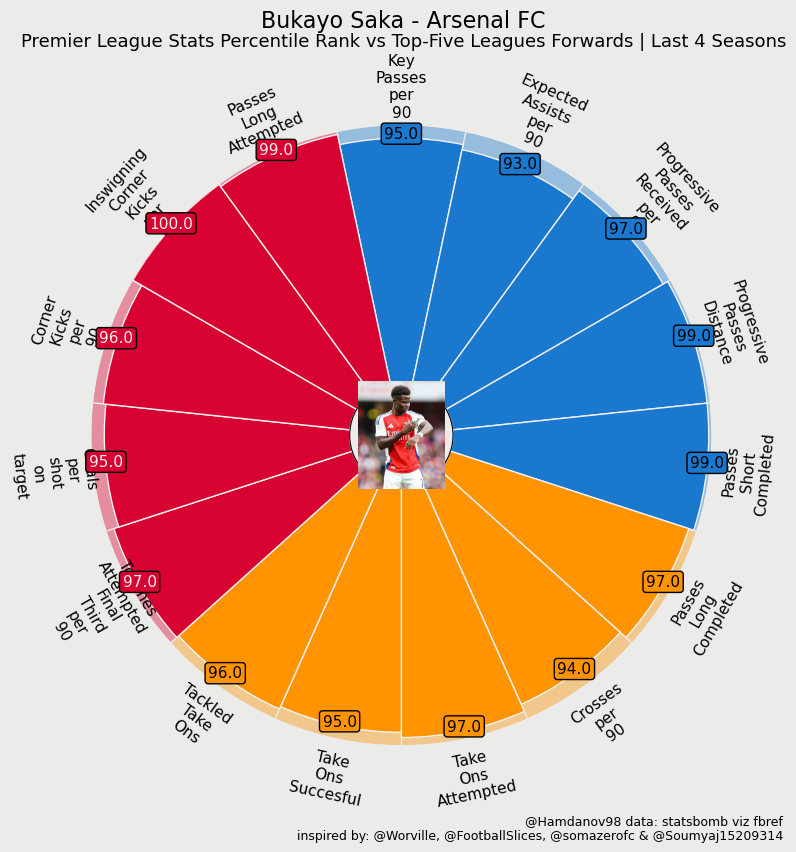

In [16]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Saka_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Bukayo Saka - Arsenal FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Saka_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in forward_players.columns:
        forward_players[feature]=-forward_players[feature]
        
        

In [18]:

# Normalize data
numerical_forward_players = forward_players[params].replace([np.inf, -np.inf], 0)
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_forward_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=forward_players.index)

In [20]:
# Get Saka's row and compute cosine similarity
Saka_index = forward_players.index[forward_players['Player'] == 'Bukayo Saka'][0]
Saka_data = transformed_df.loc[Saka_index].values.reshape(1, -1)

# Remove Saka from the dataset for comparison
transformed_df = transformed_df.drop(index=Saka_index)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, Saka_data).flatten()
transformed_df['similarity_to_Saka'] = similarity_scores

# Get top 10 players most similar to Saka
top_similar_players_indices = transformed_df.sort_values('similarity_to_Saka', ascending=False).index
top_similar_players = forward_players.loc[top_similar_players_indices]

In [22]:
# Visualize the resultsa
forward_players['similarity_to_Saka'] = transformed_df['similarity_to_Saka']
forward_players_sorted = forward_players.sort_values(by='similarity_to_Saka', ascending=False)
forward_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_Saka
82,641,Bryan Mbeumo,cm CMR,FW,Brentford,eng Premier League,0.0,1999.0,98.0,92.0,7771,86.4,0.25,0.50,0.20,0.44,0.33,0.52,0.29,0.47,246.0,110.0,45.00,120.0,49.00,41.30,0.79,4.76,13.91,23.25,4.32,41.24,2.85,1.27,1.39,24.95,150.73,69.78,2.56,1.44,1.12,-2.61,-1.73,27.97,8.14,3.07,0.43,1.85,0.70,0.22,0.13,0.17,1.85,0.36,0.05,0.01,0.00,0.01,0.00,1693.0,2573.0,66.00,26058.0,7311.0,990.0,1238.0,80.00,478.0,656.0,65.00,157.0,323.0,49.00,0.07,0.18,0.17,0.06,1.35,1.18,1.26,0.28,2.68,29.78,26.33,3.21,1.09,0.31,0.16,3.74,0.47,1.61,0.83,0.28,0.10,19.60,0.25,1.23,2.27,0.77,3.20,9.46,3.64,-6.9,-7.9,29.00,-0.12,-0.00,-0.00,-0.80,1.19,0.26,0.36,0.51,0.00,-0.00,4.14,1.01,-2.43,0.80,0.14,0.36,0.30,0.22,0.94,0.71,0.82,0.10,1.16,0.63,0.00,24.95,3,3,0,0,0,0,0.975461
5,40,Son Heung-min,kr KOR,FW,Tottenham,eng Premier League,0.0,1992.0,143.0,138.0,11942,132.7,0.50,0.75,0.48,0.73,0.36,0.62,0.34,0.60,339.0,162.0,47.79,160.0,47.20,42.37,0.38,4.02,15.69,23.29,4.47,42.34,2.55,1.22,1.21,25.99,167.77,82.01,3.05,1.64,1.37,-1.91,-1.45,31.12,7.76,3.88,0.46,2.62,0.68,0.21,0.21,0.13,2.62,0.30,0.06,0.06,0.01,0.03,0.00,3424.0,4426.0,77.36,46689.0,11624.0,2079.0,2332.0,88.22,945.0,1197.0,78.95,170.0,420.0,40.48,0.08,0.25,0.18,-0.01,2.08,1.08,1.22,0.11,2.97,33.36,28.97,4.22,0.75,0.19,0.12,3.68,0.25,2.55,1.20,0.87,0.00,25.80,0.17,0.97,0.00,1.20,0.00,13.94,0.00,19.3,18.7,26.21,-0.04,-0.00,-0.00,-0.40,1.24,0.53,0.36,0.37,0.02,-0.01,3.60,0.38,-1.0

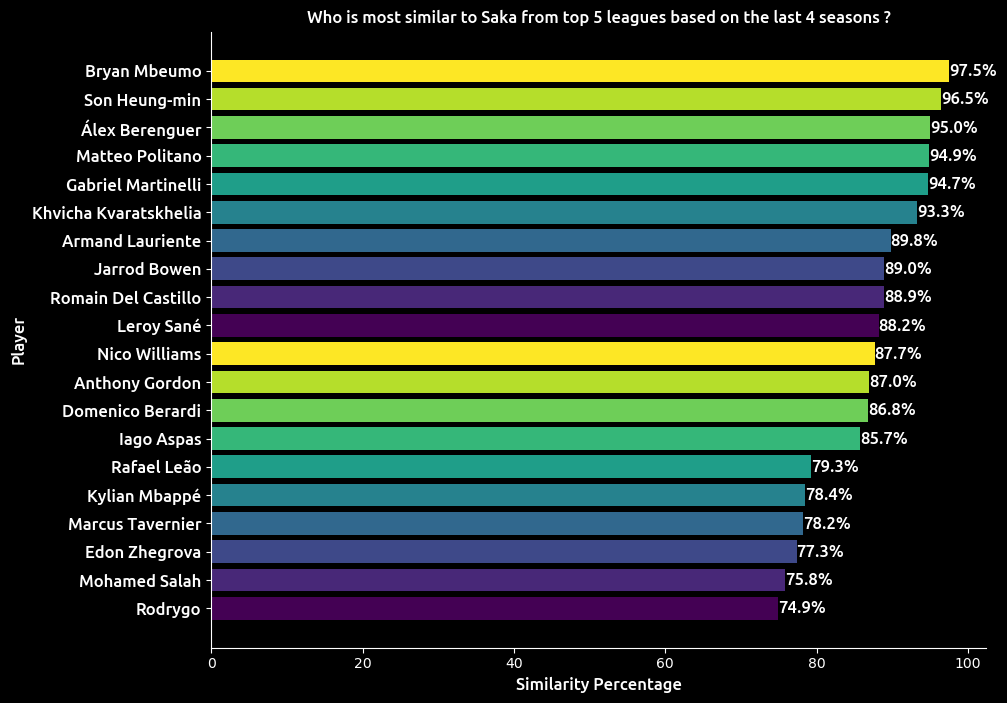

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_Saka', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(20)[::-1], (forward_players_sorted['similarity_to_Saka'].head(20)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Saka from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(20)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [24]:
Mbeumo=forward_players[forward_players['Player']=='Bryan Mbeumo']
Mbeumo

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_Saka
82,641,Bryan Mbeumo,cm CMR,FW,Brentford,eng Premier League,0.0,1999.0,98.0,92.0,7771,86.4,0.25,0.5,0.2,0.44,0.33,0.52,0.29,0.47,246.0,110.0,45.0,120.0,49.0,41.3,0.79,4.76,13.91,23.25,4.32,41.24,2.85,1.27,1.39,24.95,150.73,69.78,2.56,1.44,1.12,-2.61,-1.73,27.97,8.14,3.07,0.43,1.85,0.7,0.22,0.13,0.17,1.85,0.36,0.05,0.01,0.0,0.01,0.0,1693.0,2573.0,66.0,26058.0,7311.0,990.0,1238.0,80.0,478.0,656.0,65.0,157.0,323.0,49.0,0.07,0.18,0.17,0.06,1.35,1.18,1.26,0.28,2.68,29.78,26.33,3.21,1.09,0.31,0.16,3.74,0.47,1.61,0.83,0.28,0.1,19.6,0.25,1.23,2.27,0.77,3.2,9.46,3.64,-6.9,-7.9,29.0,-0.12,-0.0,-0.0,-0.8,1.19,0.26,0.36,0.51,0.0,-0.0,4.14,1.01,-2.43,0.8,0.14,0.36,0.3,0.22,0.94,0.71,0.82,0.1,1.16,0.63,0.0,24.95,3,3,0,0,0,0,0.975461


In [25]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Ndayishimiye's stats from the percentile ranks DataFrame
Mbeumo_percentile_ranks = round(players_percentile_ranks.iloc[[82]], 0)

# Print the percentile ranks for schlotterbeck
Mbeumo_percentile_ranks

,Key_Passes_per_90,xA_per_90,Progressive_Passes_Received_per_90,Passes_PrgDist,Passes_Short_Cmp,Passes_Long_Cmp,Crosses_per_90,Take_Ons_Attempted,Take_Ons_Succ,Tackled_Take_Ons,Touches_Att_3rd_per_90,Goals_per_shot_on_target,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Passes_Long_Att
82,73.0,81.0,76.0,90.0,81.0,89.0,89.0,80.0,79.0,82.0,79.0,79.0,91.0,91.0,92.0


In [26]:
Mbeumo_percentile_ranks_list = Mbeumo_percentile_ranks.values.flatten().tolist()

Mbeumo_percentile_ranks_list

[73.0,
 81.0,
 76.0,
 90.0,
 81.0,
 89.0,
 89.0,
 80.0,
 79.0,
 82.0,
 79.0,
 79.0,
 91.0,
 91.0,
 92.0]

In [27]:
image_path = "Mbeumo.jpg"
fdj_cropped = Image.open(image_path)

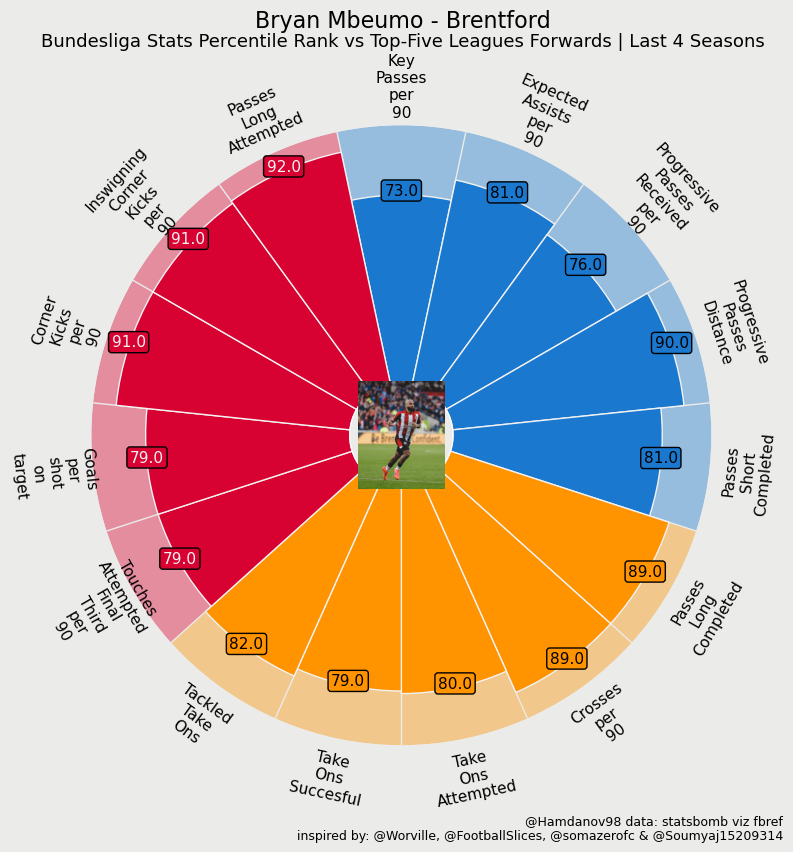

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Mbeumo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Bryan Mbeumo - Brentford", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mbeumo_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png